In [2]:
import scipy
from utils.plot import plot_loss_comparison
from PDE_PINNs import Heat_PINN_GAN, Schroedinger_PINN_GAN
from data_structuring import structure_data

# Hyperparameters
noise = 0.0        
N0 = 50 # number of data for initial samples
N_b = 50 # number of data for boundary samples
N_f = 20000 # number of data for collocation points
N_exact = 40 # number of data points that are passed with their exact solutions

# Define the physics-informed neural network
layers_G = [2, 100, 100, 100, 100, 2] # first entry should be X.shape[0], last entry should be Y.shape[0]
layers_D = [4, 100, 100, 100, 100, 1] # input should be X.shape[0]+Y.shape[0], output 1.

pde = 'heat'

# Load data from simulated dataset
data = scipy.io.loadmat('./Data/'+pde+'.mat')

# structure data
grid, X0, Y0, X_f, X_t, Y_t, X_lb, X_ub, boundary, X_star, Y_star = structure_data(pde, data, noise, N0, N_b, N_f, N_exact)

intermediary_pictures = True
lambdas = [1, 1]
enable_GAN = True
enable_PW = True
lr = [1e-3, 1e-3, 5e-3]
e = 5e-4

model1_name ='1'

layers_G[0] = 3
layers_G[-1] = 1
layers_D[0] = 4
model1 = Heat_PINN_GAN(X0, Y0, X_f, X_t, Y_t, X_lb, X_ub, boundary, \
                 layers_G= layers_G, layers_D = layers_D, \
                    intermediary_pictures=intermediary_pictures, enable_GAN = enable_GAN, enable_PW = enable_PW, dynamic_lr = False, model_name = model1_name, \
                        lambdas = lambdas, lr = lr, e = [e]+[5e-6], q = [10e-4]+[5e-5])
model1.load("Trained model/heat_3615.pth") # load


model is loading...Done.


In [9]:
pde = 'schroedinger'

# Load data from simulated dataset
data = scipy.io.loadmat('./Data/'+pde+'.mat')

# structure data
grid, X0, Y0, X_f, X_t, Y_t, X_lb, X_ub, boundary, X_star, Y_star = structure_data(pde, data, noise, N0, N_b, N_f, N_exact)

layers_G[0] = 2
layers_G[-1] = 2
layers_D[0] = 4

model2_name = '2'
model2 = Schroedinger_PINN_GAN(X0, Y0, X_f, X_t, Y_t, X_lb, X_ub, boundary, \
                 layers_G= layers_G, layers_D = layers_D, \
                    intermediary_pictures=intermediary_pictures, enable_GAN = enable_GAN, enable_PW = enable_PW, dynamic_lr = False, model_name = model2_name, \
                        lambdas = lambdas, lr = lr, e = [e]+[5e-4, 1e-4, 1e-4], q = [10e-4]+[5e-3, 5e-3, 5e-3])
model2.load("Trained model/schroedinger_999.pth") # load

model is loading...Done.


ValueError: All arrays must be of the same length

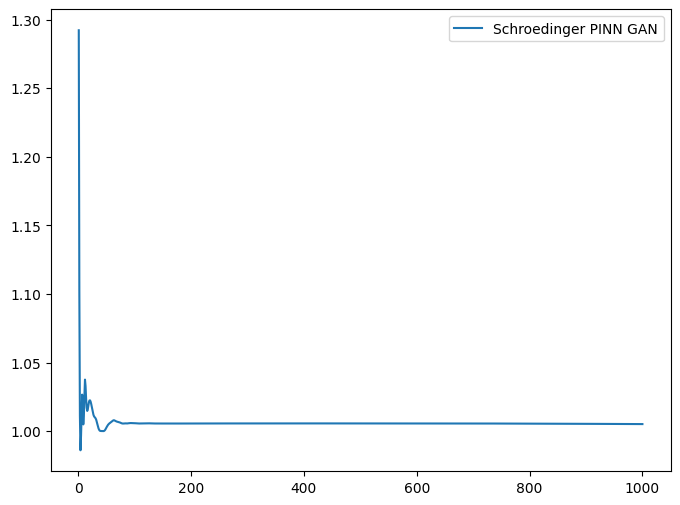

In [8]:
# Compare the model loss
plot_loss_comparison([model2.loss_values, model1.loss_values], ['Schroedinger PINN GAN', 'Heat PINN GAN'], loss_name = "Generator", filename = 'Trained model/loss_comparison.png')